In [2]:
import pandas as pd
import json

# Load the metadata
meta_data = []
with open('/Users/pinakshome/Downloads/meta_Health_and_Personal_Care.jsonl', 'r') as f:
    for line in f:
        meta_data.append(json.loads(line))

# Load the reviews data
reviews_data = []
with open('/Users/pinakshome/Downloads/Health_and_Personal_Care.jsonl', 'r') as f:
    for line in f:
        reviews_data.append(json.loads(line))

meta_df = pd.DataFrame(meta_data)
reviews_df = pd.DataFrame(reviews_data)

<h1><b> Predicting Ratings Given Product reviews </b></h1>

<h1> <b> Preprocessing</b></h1>

In [3]:
reviews_df.head()
reviews_df.drop(columns=['images'], inplace=True)

In [4]:
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,Health & Personal Care,Silicone Bath Body Brush Exfoliator Shower Bac...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Rzoeox,[],{'Package Dimensions': '15 x 3.3 x 1.5 inches;...,B07V346GZH,None
1,Health & Personal Care,"iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...",3.8,2,[Tough and Robust: Like all 78X screen protect...,[Features: 2.5D Arc Edge Treatment: The edge i...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],ZHXIN,[],"{'Brand': 'ZHXIN', 'Compatible Devices': 'Cell...",B075W927RH,None
2,Health & Personal Care,Zig Zag Rolling Machine 70mm Size With FREE BO...,3.9,7,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],None,[],{'Package Dimensions': '4.1 x 1.8 x 0.3 inches...,B01FB26VKY,None
3,Health & Personal Care,Sting-Kill Disposable Wipes 8 Each ( Pack of 5),4.1,6,[],"[effective on stings and bites from bees, wasp...",21.37,[{'thumb': 'https://m.media-amazon.com/images/...,[],Sting-kill,[],"{'Brand': 'Sting-kill', 'Item Form': 'Wipe', '...",B01IAI29RU,None
4,Health & Personal Care,Heated Eyelash Curler Mini Portable Electric E...,3.3,8,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],BiBOSS,[],{'Package Dimensions': '6.1 x 3.1 x 1.9 inches...,B08CMN38RC,None


In [5]:
meta_df.drop(columns=['images','videos','categories','features','description','main_category','bought_together'], inplace=True)

In [6]:
########## DUPLICATES

In [7]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           60293 non-null  object 
 1   average_rating  60293 non-null  float64
 2   rating_number   60293 non-null  int64  
 3   price           10536 non-null  float64
 4   store           57947 non-null  object 
 5   details         60293 non-null  object 
 6   parent_asin     60293 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ MB


In [8]:
# Remove duplicate rows and keep only the first occurrence
new_df =reviews_df.drop_duplicates()

# Display the shape of the new DataFrame to confirm the removal
print(new_df.shape)

(488991, 9)


In [9]:
# Assuming df is your DataFrame
unique_values_per_column = new_df.nunique()

# Display the number of unique values for each column
print(unique_values_per_column)

rating                    5
title                284139
text                 455036
asin                  62597
parent_asin           60274
user_id              461656
timestamp            488771
helpful_vote            271
verified_purchase         2
dtype: int64


In [10]:
new_df.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1580950175902,3,True
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,1604354586880,3,True
2,5.0,Fantastic,I have been suffering a couple months with hee...,B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1563966838905,0,True
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,1662258542725,7,True
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,1642722787262,0,True


In [11]:
# Drop duplicates to get unique user_id and parent_asin combinations
unique_combinations = new_df.drop_duplicates(subset=['user_id', 'parent_asin'])

# Print the number of unique combinations
num_unique_combinations = unique_combinations.shape[0]
print(f"Number of unique user_id and parent_asin combinations: {num_unique_combinations}")

# Optional: Display the unique combinations
print(unique_combinations[['user_id', 'parent_asin']])

Number of unique user_id and parent_asin combinations: 488188
                             user_id parent_asin
0       AFKZENTNBQ7A7V7UXW5JJI6UGRYQ  B07TDSJZMR
1       AEVWAM3YWN5URJVJIZZ6XPD2MKIA  B08637FWWF
2       AHSPLDNW5OOUK2PLH7GXLACFBZNQ  B07KJVGNN5
3       AEZGPLOYTSAPR3DHZKKXEFPAXUAA  B092RP73CX
4       AEQAYV7RXZEBXMQIQPL6KCT2CFWQ  B08KYJLF5T
...                              ...         ...
494116  AEQG5UEVYBNLWPXB3E2EODQ3EGSQ  B07KXT7Y48
494117  AGTVLNJAFZTKURBCHLUIH6VEOQCQ  B07KXT7Y48
494118  AGMA5UN3JPLQLQZ2PFYHJYSC4PNA  B07KXT7Y48
494119  AE2Q3FXHIVGSSDGTNI4YLXDXMCIA  B07KXT7Y48
494120  AH5K35CHSUC2QMGRMDQNXR6BJ72A  B07JYKP19X

[488188 rows x 2 columns]


In [12]:
meta_df.head()

,title,average_rating,rating_number,price,store,details,parent_asin
0,Silicone Bath Body Brush Exfoliator Shower Bac...,3.9,7,NaN,Rzoeox,{'Package Dimensions': '15 x 3.3 x 1.5 inches;...,B07V346GZH
1,"iPhone 7 Plus 8 Plus Screen Protector, ZHXIN T...",3.8,2,NaN,ZHXIN,"{'Brand': 'ZHXIN', 'Compatible Devices': 'Cell...",B075W927RH
2,Zig Zag Rolling Machine 70mm Size With FREE BO...,3.9,7,NaN,None,{'Package Dimensions': '4.1 x 1.8 x 0.3 inches...,B01FB26VKY
3,Sting-Kill Disposable Wipes 8 Each ( Pack of 5),4.1,6,21.37,Sting-kill,"{'Brand': 'Sting-kill', 'Item Form': 'Wipe', '...",B01IAI29RU
4,Heated Eyelash Curler Mini Portable Electric E...,3.3,8,NaN,BiBOSS,{'Package Dimensions': '6.1 x 3.1 x 1.9 inches...,B08CMN38RC


In [13]:
print("Columns in meta_df:")
print(meta_df.columns)

Columns in meta_df:
Index(['title', 'average_rating', 'rating_number', 'price', 'store', 'details',
       'parent_asin'],
      dtype='object')


In [14]:
#meta_df['features'] = meta_df['features'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
#meta_df['description'] = meta_df['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [15]:
def flatten_details(details):
    if isinstance(details, dict):
        flat_details = []
        for key, value in details.items():
            if isinstance(value, dict):
                flat_details.extend([f"{k}: {v}" for k, v in value.items()])
            else:
                flat_details.append(f"{key}: {value}")
        return ' '.join(flat_details)
    return details

meta_df['details'] = meta_df['details'].apply(flatten_details)

In [16]:
# Find duplicate rows
duplicate_rows = meta_df.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Display the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicate_rows}')

Number of duplicate rows: 0


In [17]:
meta_df['store'].fillna('Unknown', inplace=True)

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_30980/1783837084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_df['store'].fillna('Unknown', inplace=True)


<h4> Mean imputing price</h4>

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


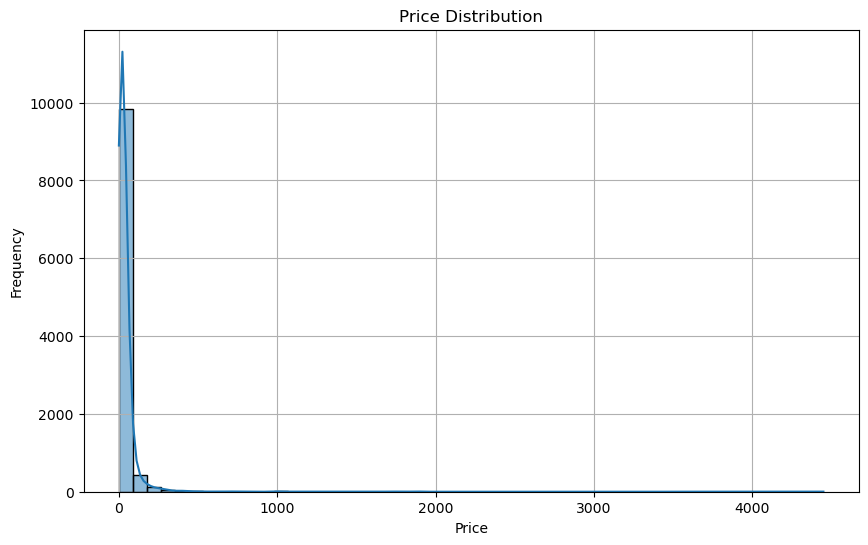

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(meta_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
meta_df.describe()

,average_rating,rating_number,price
count,60293.000000,60293.000000,10536.000000
mean,3.979625,61.924718,43.736799
std,0.846449,479.554144,168.444240
min,1.000000,1.000000,0.100000
25%,3.500000,3.000000,11.990000
50%,4.100000,10.000000,19.990000
75%,4.600000,32.000000,36.090000
max,5.000000,60033.000000,4449.000000


In [20]:
meta_df['price'] = pd.to_numeric(meta_df['price'], errors='coerce')
meta_df['price'].fillna(meta_df['price'].mean(), inplace=True)

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_30980/7897773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_df['price'].fillna(meta_df['price'].mean(), inplace=True)


In [21]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60293 entries, 0 to 60292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           60293 non-null  object 
 1   average_rating  60293 non-null  float64
 2   rating_number   60293 non-null  int64  
 3   price           60293 non-null  float64
 4   store           60293 non-null  object 
 5   details         60293 non-null  object 
 6   parent_asin     60293 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.2+ MB


In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488991 entries, 0 to 494120
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             488991 non-null  float64
 1   title              488991 non-null  object 
 2   text               488991 non-null  object 
 3   asin               488991 non-null  object 
 4   parent_asin        488991 non-null  object 
 5   user_id            488991 non-null  object 
 6   timestamp          488991 non-null  int64  
 7   helpful_vote       488991 non-null  int64  
 8   verified_purchase  488991 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 34.0+ MB


In [23]:
new_df.drop(columns=['timestamp'], inplace=True)

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_30980/1515603794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['timestamp'], inplace=True)


<h1> <b> Performing Merge </b></h1>

In [24]:
merged_df = pd.merge(new_df, meta_df, on='parent_asin', how='left')

In [25]:
merged_df.head()

,rating,title_x,text,asin,parent_asin,user_id,helpful_vote,verified_purchase,title_y,average_rating,rating_number,price,store,details
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,3,True,High Potency Magnesium Citrate Capsules 1000mg...,4.5,470,43.736799,Life Nutrition,Brand: Life Nutrition Unit Count: 60 Count Fla...
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,3,True,Evolve Concentrated Bleach Tablets - 32-ct Bot...,4.8,181,43.736799,Evolve,"Brand: Evolve Scent: Fresh,Lemon Product Benef..."
2,5.0,Fantastic,I have been suffering a couple months with hee...,B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,0,True,"Dr. Foot's Gel Heel Protectors, Plantar Fascii...",3.6,78,43.736799,Dr.Foot,Is Discontinued By Manufacturer: No Product Di...
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,7,True,"Homedics Bubble Bliss Deluxe-Foot Spa, Heat Ma...",4.4,8312,43.736799,Homedics,Use for: Feet Power Source: Corded Electric Ma...
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,0,True,Brain Supplement 1053mg - Premium Nootropic Br...,4.1,94,43.736799,Nature's Nutrition,Brand: Nature's Nutrition Unit Count: 180.00 C...


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488991 entries, 0 to 488990
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             488991 non-null  float64
 1   title_x            488991 non-null  object 
 2   text               488991 non-null  object 
 3   asin               488991 non-null  object 
 4   parent_asin        488991 non-null  object 
 5   user_id            488991 non-null  object 
 6   helpful_vote       488991 non-null  int64  
 7   verified_purchase  488991 non-null  bool   
 8   title_y            488991 non-null  object 
 9   average_rating     488991 non-null  float64
 10  rating_number      488991 non-null  int64  
 11  price              488991 non-null  float64
 12  store              488991 non-null  object 
 13  details            488991 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 49.0+ MB


<h1><b>Exploratory Data Analysis</b></h1>

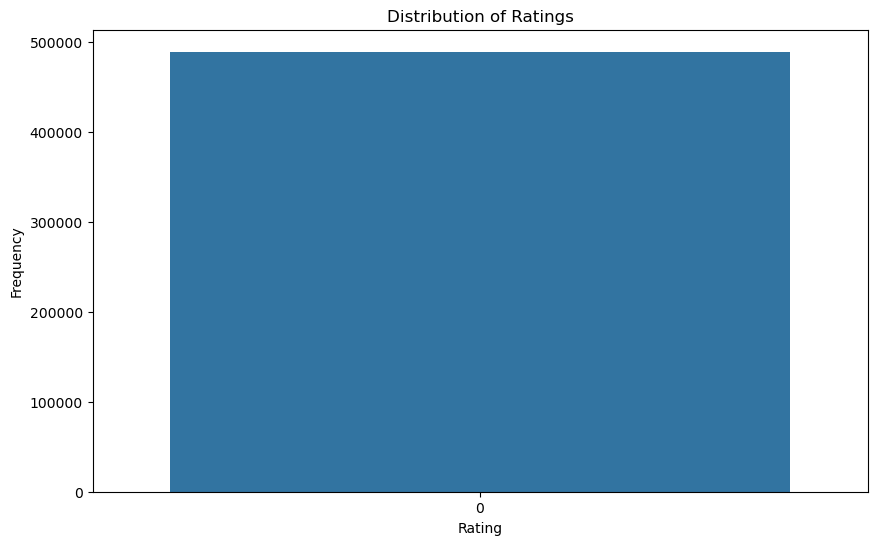

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(merged_df['rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


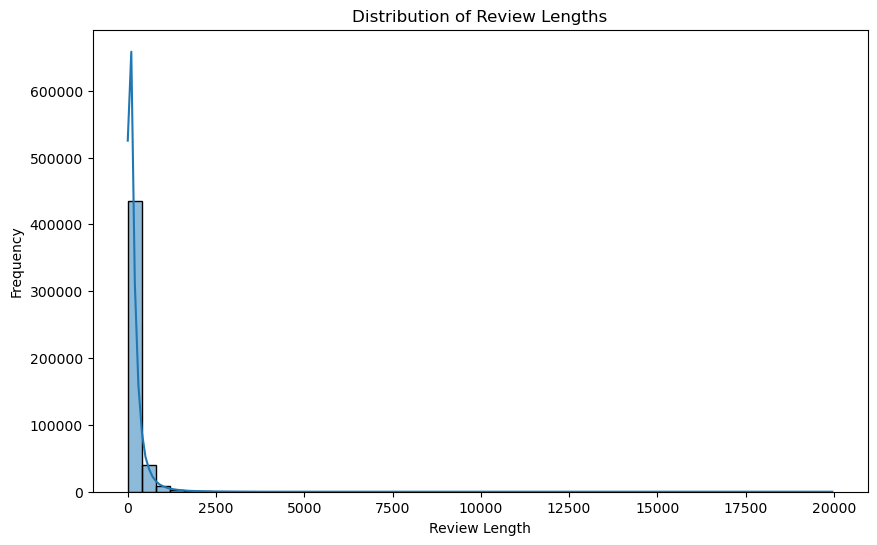

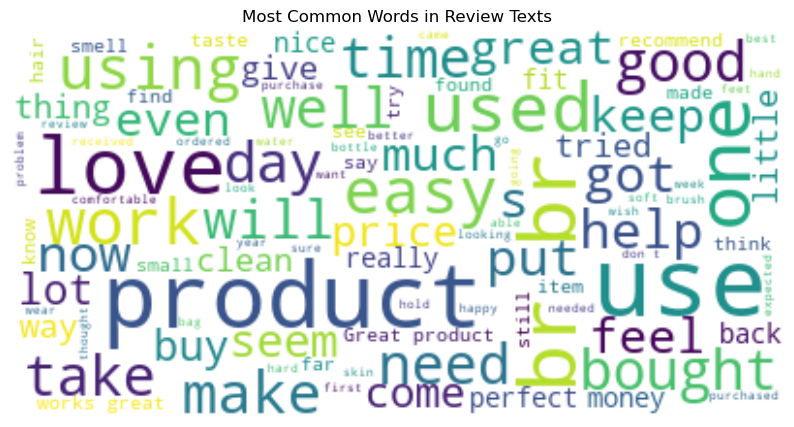

In [27]:
# Review length
merged_df['review_length'] = merged_df['text'].apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Word cloud of review texts
from wordcloud import WordCloud

text = ' '.join(review for review in merged_df['text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Review Texts')
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


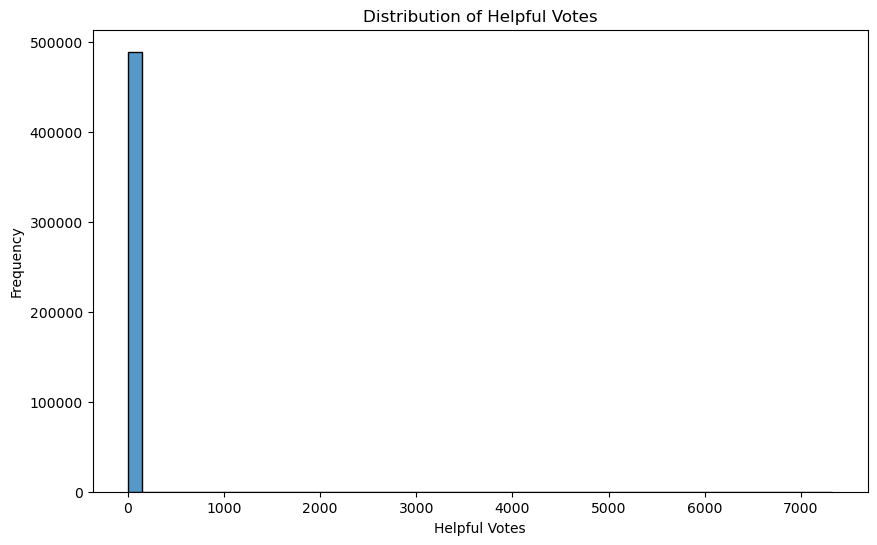

In [93]:
# Plot distribution of helpful votes
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['helpful_vote'], bins=50)
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


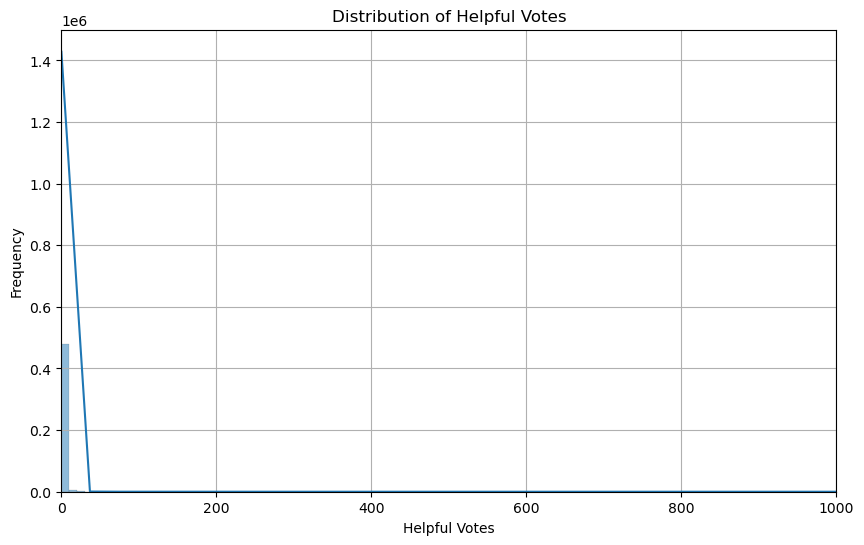

In [95]:
# Plot distribution of helpful votes with smaller bin width and x-axis limited to values under 1000
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['helpful_vote'], binwidth=10, kde=True)  # Adjust bin width as needed
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Set x-axis limit to focus on values under 1000
plt.grid(True)  # Add grid lines for better readability
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


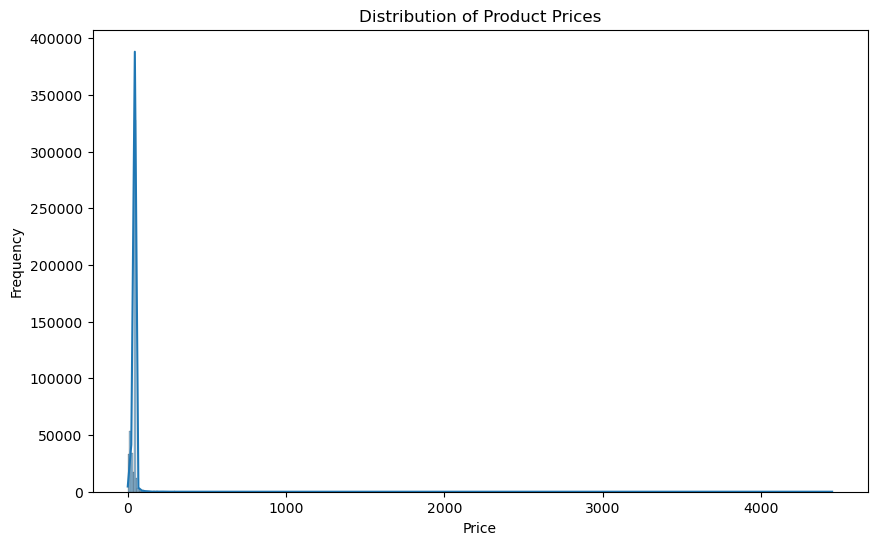

In [94]:
# Plot distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price'], binwidth=10,kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-

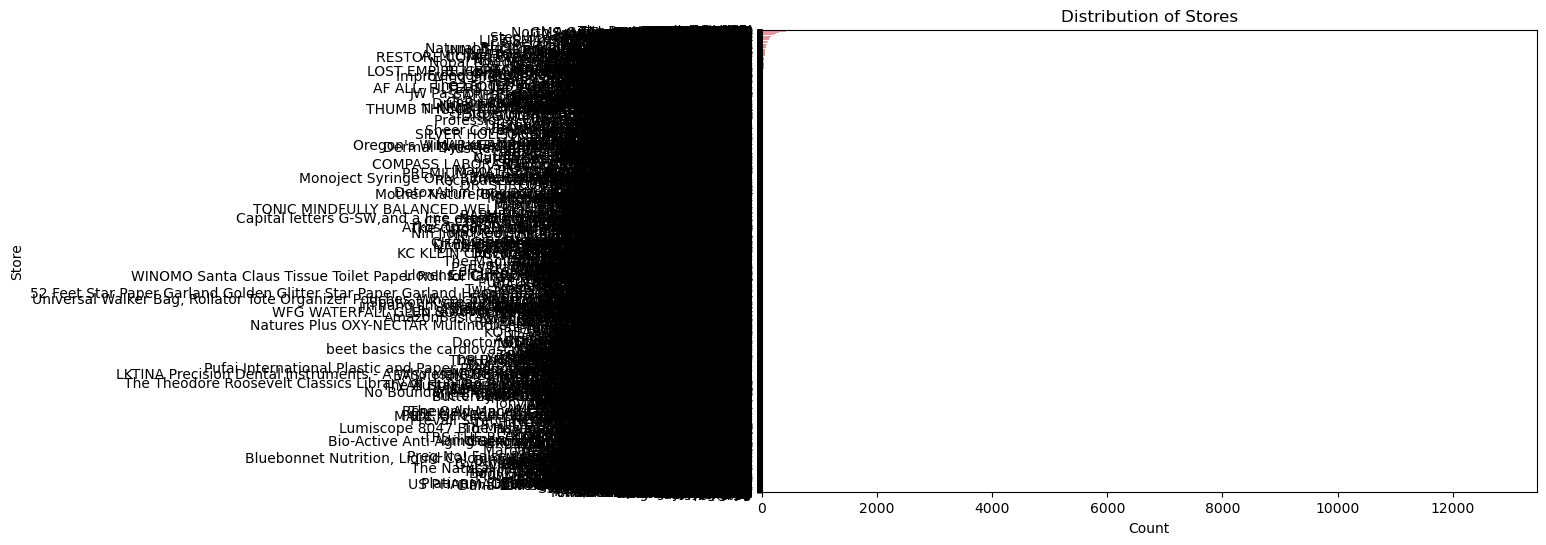

In [96]:
# Distribution of stores
plt.figure(figsize=(10, 6))
sns.countplot(y='store', data=merged_df, order=merged_df['store'].value_counts().index)
plt.title('Distribution of Stores')
plt.xlabel('Count')
plt.ylabel('Store')
plt.show()


/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


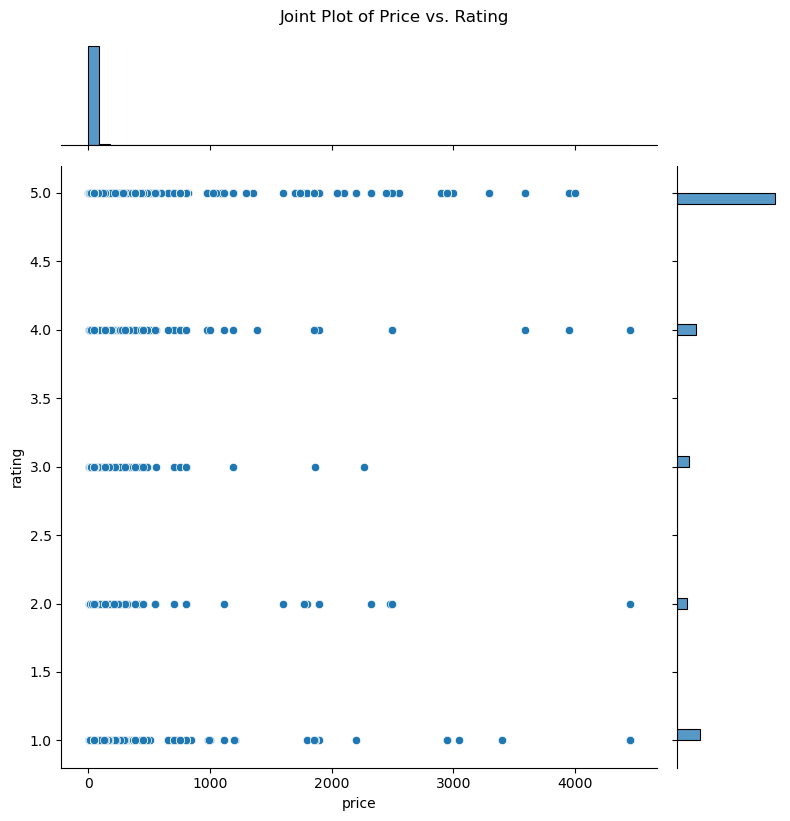

In [31]:
import seaborn as sns

# Joint plot of price vs. rating
sns.jointplot(x='price', y='rating', data=merged_df, kind='scatter', height=8, ratio=5, marginal_kws=dict(bins=50, fill=True))
plt.suptitle('Joint Plot of Price vs. Rating', y=1.02)
plt.show()


/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

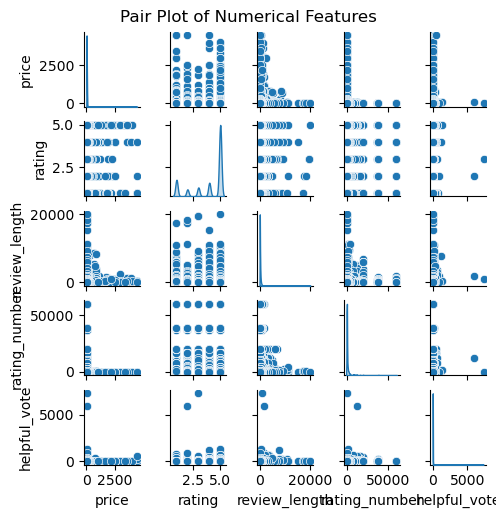

In [81]:
# Select relevant numerical features
numerical_features = ['price', 'rating', 'review_length', 'rating_number', 'helpful_vote']

# Pair plot of selected numerical features
sns.pairplot(merged_df[numerical_features], diag_kind='kde', height=1)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

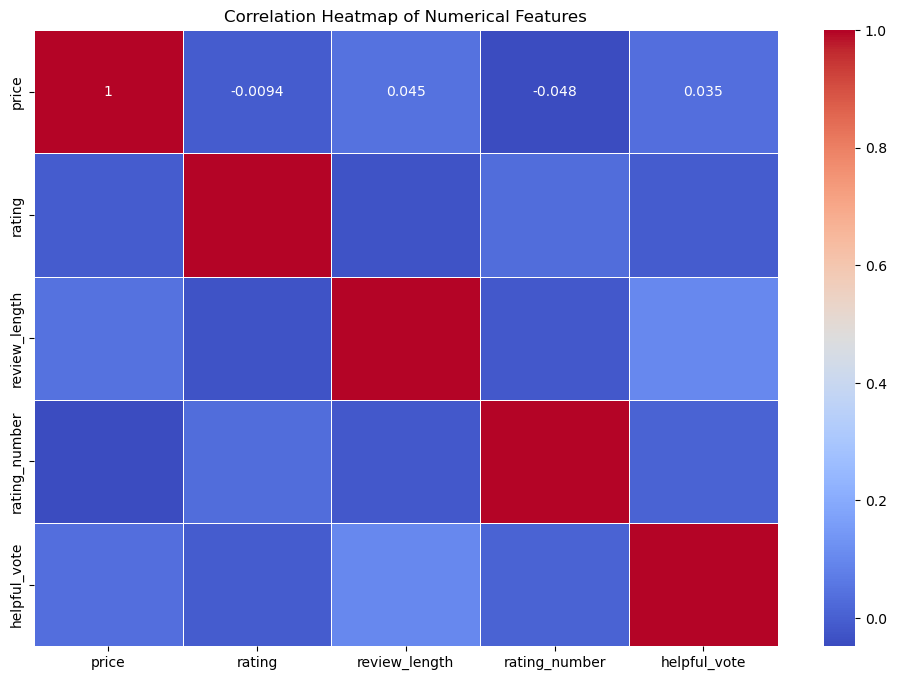

In [33]:
# Correlation matrix
corr_matrix = merged_df[numerical_features].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


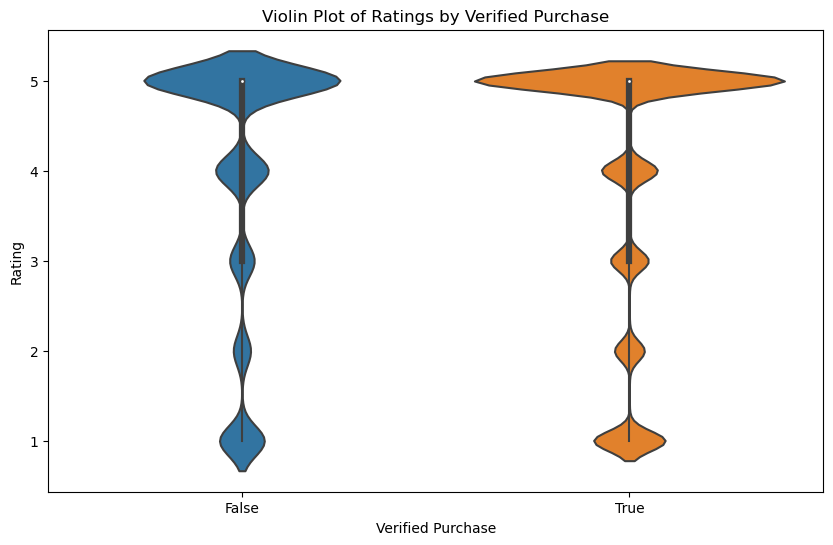

In [34]:
# Violin plot of ratings by verified purchase
plt.figure(figsize=(10, 6))
sns.violinplot(x='verified_purchase', y='rating', data=merged_df)
plt.title('Violin Plot of Ratings by Verified Purchase')
plt.xlabel('Verified Purchase')
plt.ylabel('Rating')
plt.show()


/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-

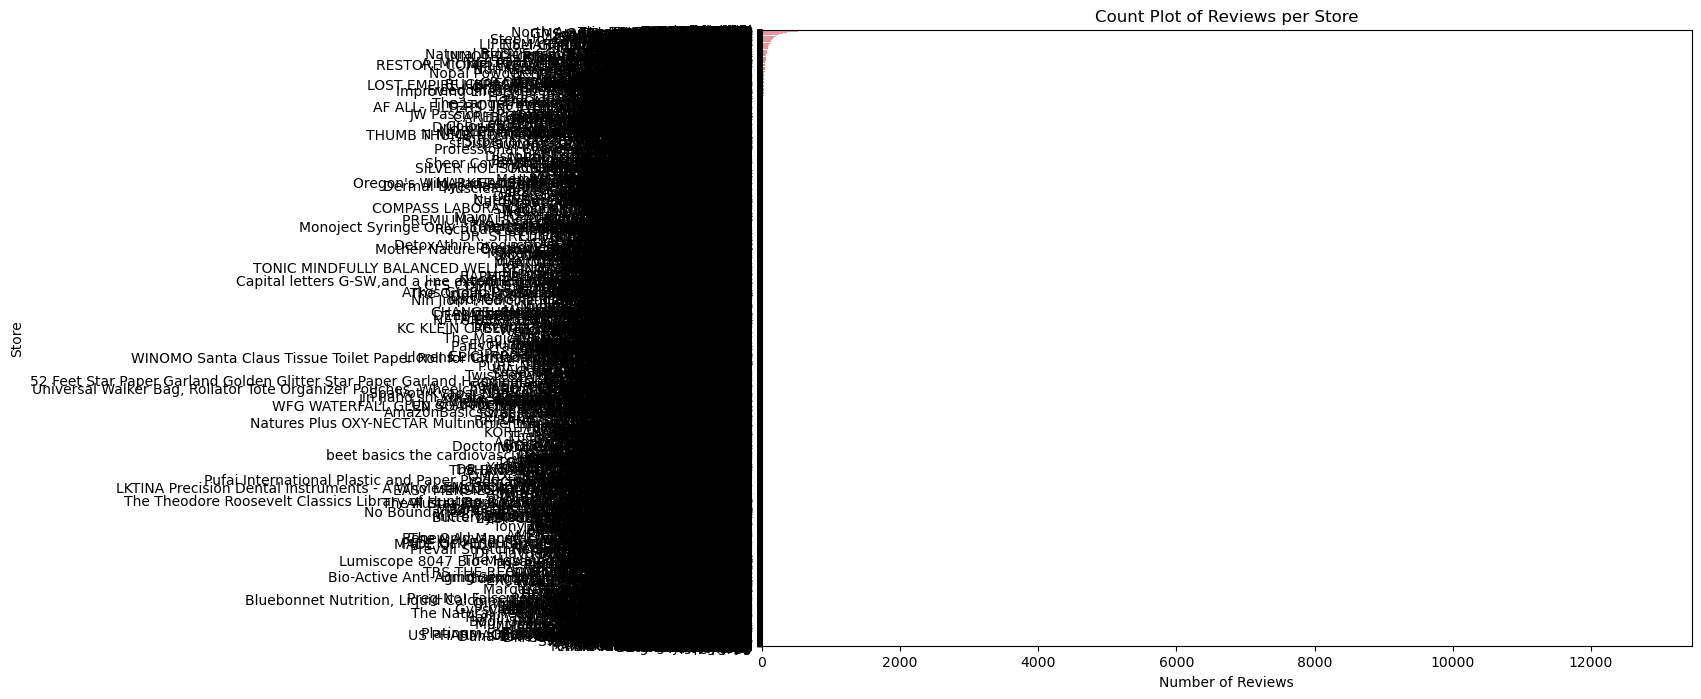

In [35]:
# Count plot of reviews per store
plt.figure(figsize=(12, 8))
sns.countplot(y='store', data=merged_df, order=merged_df['store'].value_counts().index)
plt.title('Count Plot of Reviews per Store')
plt.xlabel('Number of Reviews')
plt.ylabel('Store')
plt.show()


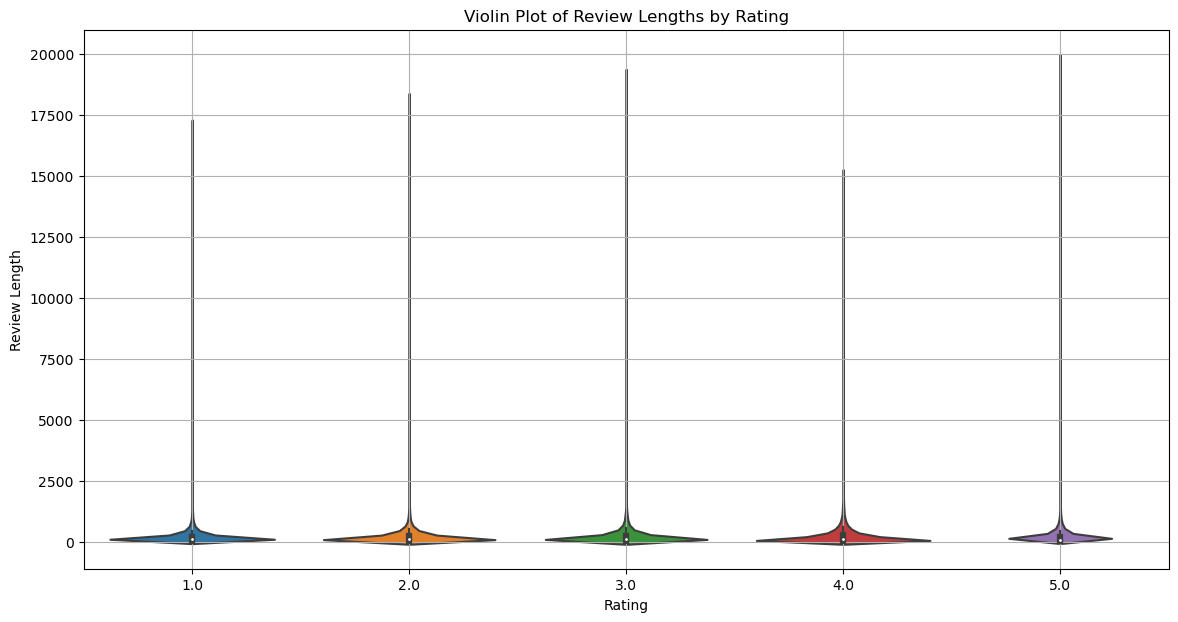

In [36]:
# Violin plot of review lengths by rating
plt.figure(figsize=(14, 7))
sns.violinplot(x='rating', y='review_length', data=merged_df)
plt.title('Violin Plot of Review Lengths by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.grid(True)
plt.show()

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488991 entries, 0 to 488990
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             488991 non-null  float64
 1   title_x            488991 non-null  object 
 2   text               488991 non-null  object 
 3   asin               488991 non-null  object 
 4   parent_asin        488991 non-null  object 
 5   user_id            488991 non-null  object 
 6   helpful_vote       488991 non-null  int64  
 7   verified_purchase  488991 non-null  bool   
 8   title_y            488991 non-null  object 
 9   average_rating     488991 non-null  float64
 10  rating_number      488991 non-null  int64  
 11  price              488991 non-null  float64
 12  store              488991 non-null  object 
 13  details            488991 non-null  object 
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 49.0+ MB


In [ ]:
# Identify empty values in the 'features' column
empty_features = merged_df['features'].apply(lambda x: x == '' or x == [])

# Print rows with empty values in 'features' column
empty_features_rows = merged_df[empty_features]
print("Rows with empty values in 'features' column:")
print(empty_features_rows)

In [28]:
# Identify empty values in the 'features' column
empty_details = merged_df['details'].apply(lambda x: x == '' or x == [])

# Print rows with empty values in 'features' column
empty_features_rows = merged_df[empty_details]
print(len(empty_features_rows))

4984


In [29]:
# Identify empty values in the 'features' column
#empty_features = merged_df['features'].apply(lambda x: x == '' or x == [])

# Print rows with empty values in 'features' column
#empty_features_rows = merged_df[empty_features]
#print(len(empty_features_rows))

In [30]:
merged_df = merged_df[~empty_details]

In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             484007 non-null  float64
 1   title_x            484007 non-null  object 
 2   text               484007 non-null  object 
 3   asin               484007 non-null  object 
 4   parent_asin        484007 non-null  object 
 5   user_id            484007 non-null  object 
 6   helpful_vote       484007 non-null  int64  
 7   verified_purchase  484007 non-null  bool   
 8   title_y            484007 non-null  object 
 9   average_rating     484007 non-null  float64
 10  rating_number      484007 non-null  int64  
 11  price              484007 non-null  float64
 12  store              484007 non-null  object 
 13  details            484007 non-null  object 
 14  review_length      484007 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(8)
memory usage

In [32]:
merged_df['x_length'] = merged_df['title_x'].apply(len)
merged_df['y_length'] = merged_df['title_y'].apply(len)
merged_df['de_length'] = merged_df['details'].apply(len)

In [39]:
merged_df['review_length'] = merged_df['text'].apply(len)

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_21453/541862846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['review_length'] = merged_df['text'].apply(len)


In [33]:
merged_df.drop(columns=['asin'], inplace=True)

In [34]:
merged_df.drop(columns=['parent_asin'], inplace=True)

In [35]:
merged_df.drop(columns=['user_id'], inplace=True)

In [36]:
merged_df.drop(columns=['store'], inplace=True)

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             484007 non-null  float64
 1   title_x            484007 non-null  object 
 2   text               484007 non-null  object 
 3   helpful_vote       484007 non-null  int64  
 4   verified_purchase  484007 non-null  bool   
 5   title_y            484007 non-null  object 
 6   average_rating     484007 non-null  float64
 7   rating_number      484007 non-null  int64  
 8   price              484007 non-null  float64
 9   details            484007 non-null  object 
 10  review_length      484007 non-null  int64  
 11  x_length           484007 non-null  int64  
 12  y_length           484007 non-null  int64  
 13  de_length          484007 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(4)
memory usage: 52.2+ MB


In [41]:
merged_df.to_csv('merged_df.csv', index=False)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             484007 non-null  float64
 1   title_x            484007 non-null  object 
 2   text               484007 non-null  object 
 3   helpful_vote       484007 non-null  int64  
 4   verified_purchase  484007 non-null  bool   
 5   title_y            484007 non-null  object 
 6   average_rating     484007 non-null  float64
 7   rating_number      484007 non-null  int64  
 8   price              484007 non-null  float64
 9   details            484007 non-null  object 
 10  review_length      484007 non-null  int64  
 11  x_length           484007 non-null  int64  
 12  y_length           484007 non-null  int64  
 13  de_length          484007 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(4)
memory usage: 52.2+ MB


<h1> <b> Modeling </b></h2>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fill NaN values in text columns with an empty string
text_columns = ['text', 'title_x', 'title_y', 'details']
merged_df[text_columns] = merged_df[text_columns].fillna('')

# Combine text columns into one for TF-IDF vectorization
merged_df['combined_text'] = merged_df['text'] + ' ' + merged_df['title_x'] + ' ' + merged_df['title_y'] + ' ' + merged_df['details']

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit the number of features
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['combined_text'])

# Convert TF-IDF matrix to array
tfidf_array = tfidf_matrix.toarray()

# Normalize numerical features
numerical_features = merged_df[['price', 'average_rating', 'rating_number', 'helpful_vote', 'x_length', 'y_length', 'de_length','review_length']]
scaler = StandardScaler()
normalized_numerical_features = scaler.fit_transform(numerical_features)

# Combine TF-IDF features with normalized numerical features
X = np.hstack([tfidf_array, normalized_numerical_features])

# Define the target variable
y = merged_df['rating'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)  # Use all cores
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_20015/655466108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[text_columns] = merged_df[text_columns].fillna('')
/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_20015/655466108.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['combined_text'] = merged_df['text'] + ' ' + merged_df['title_x'] + ' ' + merged_df['title_y'] + ' ' + merged_df['details']


<h2> Trying to extract product names and keywords from spacy models - Ends up not working well </h2>

In [41]:
import re

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

merged_df['clean_summary'] = merged_df['title_x'].apply(preprocess_text)
merged_df['clean_review'] = merged_df['text'].apply(preprocess_text)
merged_df['clean_title'] = merged_df['title_y'].apply(preprocess_text)
merged_df['clean_details'] = merged_df['details'].apply(preprocess_text)


In [46]:
import spacy

# Load pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == "PRODUCT"]

merged_df['product_name_from_title'] = merged_df['clean_title'].apply(extract_entities)
merged_df['product_name_from_review'] = merged_df['clean_review'].apply(extract_entities)
merged_df['product_name_from_s'] = merged_df['clean_summary'].apply(extract_entities)
merged_df['product_name_from_d'] = merged_df['clean_details'].apply(extract_entities)

In [49]:
from rake_nltk import Rake

rake = Rake()

def extract_keywords(text):
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()[:5]  # Top 5 keywords

merged_df['keywords_from_title'] = merged_df['clean_title'].apply(extract_keywords)
merged_df['keywords_from_review'] = merged_df['clean_review'].apply(extract_keywords)
merged_df['keywords_from_s'] = merged_df['clean_summary'].apply(extract_keywords)
merged_df['keywords_from_d'] = merged_df['clean_details'].apply(extract_keywords)


In [51]:
def combine_results(row):
    entities = row['product_name_from_title'] + row['product_name_from_review'] + row['product_name_from_s'] + row['product_name_from_d']
    keywords = row['keywords_from_title'] + row['keywords_from_review'] + row['keywords_from_s'] + row['keywords_from_d']  
    
    # Combine and deduplicate results
    combined = list(set(entities + keywords))
    
    # Apply custom heuristics, e.g., filter out common words, short words, etc.
    refined = [word for word in combined if len(word) > 2 and not word.isdigit()]
    
    return refined

merged_df['extracted_product_names'] = merged_df.apply(combine_results, axis=1)

In [54]:
merged_df['extracted_product_names'][:20]

0     [take one 1000 mg pill, clarify someone elses ...
1     [lanet using less plastic, save, evolve concen...
2     [product dimensions 55 x 3 x 15 inches 48 ounc...
3     [joke though, feet power source corded electri...
4     [saying, brain supplement 1053mg premium nootr...
5     [carlyle, every home, brand carlyle primary su...
6     [irritation highly recommend, dry gold, super ...
7     [quality nights sleep, makes, 90 second interv...
8     [packaging teachers gifts, brand sosmar materi...
9     [would stay, slight improvement, big plus, wor...
10    [jinri professional tourmaline hair dryer nega...
11    [really liked, sizing, date first available ma...
12    [see less spots, installing whole house water ...
13    [daily smoothiefruitveggie shake, add, super o...
14    [origin usa item model number b075dllc4v date ...
15    [chocolate exlax flavoring boy, digestive adva...
16    [water sweating, science, last thing, items 1 ...
17    [returned, discontinued, north american wa

In [55]:
merged_df.head()

,rating,title_x,text,helpful_vote,verified_purchase,title_y,average_rating,rating_number,price,details,...,clean_details,product_name_from_title,product_name_from_review,product_name_from_s,product_name_from_d,keywords_from_title,keywords_from_review,keywords_from_s,keywords_from_d,extracted_product_names
0,4.0,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,High Potency Magnesium Citrate Capsules 1000mg...,4.5,470,43.736799,Brand: Life Nutrition Unit Count: 60 Count Fla...,...,brand life nutrition unit count 60 count flavo...,[],[],[],[],[high potency magnesium citrate capsules 1000m...,[advertised another little label says 12mg bc ...,"[periodic table people mg, 12 mg, 12, magnesium]",[items 1 package dimensions 4 x 18 x 18 inches...,"[take one 1000 mg pill, clarify someone elses ..."
1,5.0,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,Evolve Concentrated Bleach Tablets - 32-ct Bot...,4.8,181,43.736799,"Brand: Evolve Scent: Fresh,Lemon Product Benef...",...,brand evolve scent freshlemon product benefits...,[],[],[],[],[evolve concentrated bleach tablets 32ct bottl...,[easy multitasking bleach tablets beats carryi...,"[lanet using less plastic, save]",[brand evolve scent freshlemon product benefit...,"[lanet using less plastic, save, evolve concen..."
2,5.0,Fantastic,I have been suffering a couple months with hee...,0,True,"Dr. Foot's Gel Heel Protectors, Plantar Fascii...",3.6,78,43.736799,Is Discontinued By Manufacturer: No Product Di...,...,is discontinued by manufacturer no product dim...,[],[],[],[],[dr foots gel heel protectors plantar fasciiti...,"[thought id give, thicker version, plantar fas...",[fantastic],[product dimensions 55 x 3 x 15 inches 48 ounc...,[product dimensions 55 x 3 x 15 inches 48 ounc...
3,4.0,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,"Homedics Bubble Bliss Deluxe-Foot Spa, Heat Ma...",4.4,8312,43.736799,Use for: Feet Power Source: Corded Electric Ma...,...,use for feet power source corded electric mate...,[],[],[],[],[homedics bubble bliss deluxefoot spa heat mai...,"[3 little plastic parts, plain tub, massage fu...","[makes bubbles thats, water, holds, bought]",[feet power source corded electric material pl...,"[joke though, feet power source corded electri..."
4,1.0,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,Brain Supplement 1053mg - Premium Nootropic Br...,4.1,94,43.736799,Brand: Nature's Nutrition Unit Count: 180.00 C...,...,brand natures nutrition unit count 18000 count...,[],[],[],[],[brain supplement 1053mg premium nootropic bra...,"[thing, saying, dont, didnt]",[],[items 1 dosage form capsule package dimension...,"[saying, brain supplement 1053mg premium nootr..."


In [73]:
merged_df['title_x'].nunique()

281429

In [74]:
merged_df['title_y'].nunique()

57832

In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rating                    484007 non-null  float64
 1   title_x                   484007 non-null  object 
 2   text                      484007 non-null  object 
 3   helpful_vote              484007 non-null  int64  
 4   verified_purchase         484007 non-null  bool   
 5   title_y                   484007 non-null  object 
 6   average_rating            484007 non-null  float64
 7   rating_number             484007 non-null  int64  
 8   price                     484007 non-null  float64
 9   details                   484007 non-null  object 
 10  review_length             484007 non-null  int64  
 11  x_length                  484007 non-null  int64  
 12  y_length                  484007 non-null  int64  
 13  de_length                 484007 non-null  int64 

In [78]:
merged_df.drop(columns=['extracted_product_names','keywords_from_d', 'keywords_from_s', 'keywords_from_review', 'keywords_from_title',
                     'clean_summary', 'clean_review', 'clean_title', 'clean_details'], inplace=True)

In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   rating                    484007 non-null  float64
 1   title_x                   484007 non-null  object 
 2   text                      484007 non-null  object 
 3   helpful_vote              484007 non-null  int64  
 4   verified_purchase         484007 non-null  bool   
 5   title_y                   484007 non-null  object 
 6   average_rating            484007 non-null  float64
 7   rating_number             484007 non-null  int64  
 8   price                     484007 non-null  float64
 9   details                   484007 non-null  object 
 10  review_length             484007 non-null  int64  
 11  x_length                  484007 non-null  int64  
 12  y_length                  484007 non-null  int64  
 13  de_length                 484007 non-null  int64 

In [80]:
merged_df.drop(columns=['product_name_from_title','product_name_from_review', 'product_name_from_s', 'product_name_from_d'], inplace=True)

In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484007 entries, 0 to 488990
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             484007 non-null  float64
 1   title_x            484007 non-null  object 
 2   text               484007 non-null  object 
 3   helpful_vote       484007 non-null  int64  
 4   verified_purchase  484007 non-null  bool   
 5   title_y            484007 non-null  object 
 6   average_rating     484007 non-null  float64
 7   rating_number      484007 non-null  int64  
 8   price              484007 non-null  float64
 9   details            484007 non-null  object 
 10  review_length      484007 non-null  int64  
 11  x_length           484007 non-null  int64  
 12  y_length           484007 non-null  int64  
 13  de_length          484007 non-null  int64  
dtypes: bool(1), float64(3), int64(6), object(4)
memory usage: 68.3+ MB
